In [ ]:
#Подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import math

In [ ]:
#1 Загрузить и визуализировать датасет
df = pd.read_csv('ex2data1.txt', header=None, names=['x1', 'x2','y'])
data = df[['x1', 'x2','y']].values
df.head(5)

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


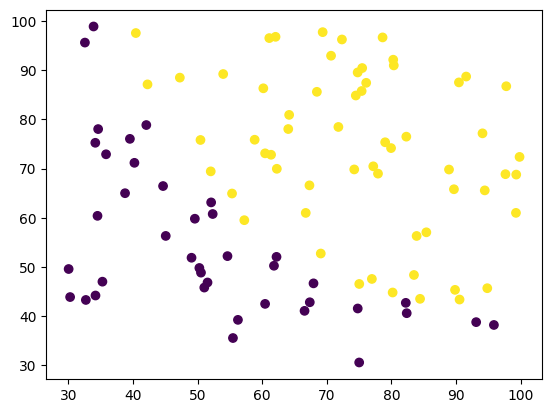

In [ ]:
plt.scatter(data[:, 0], data[:, 1],  c=data[:, 2])
plt.show()

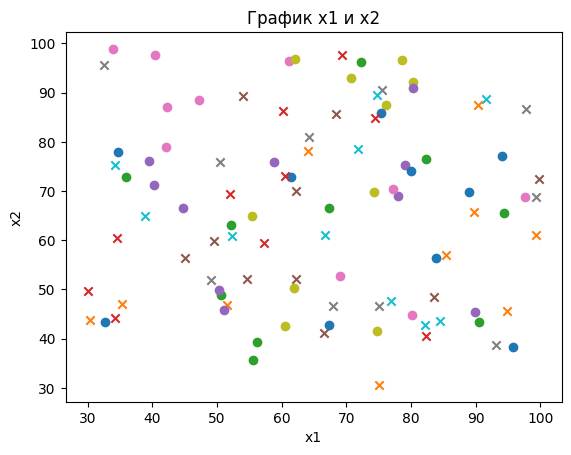

In [ ]:
#График
markers = ['o', 'x']
fig, ax = plt.subplots()
for i, label in enumerate(data):
    ax.scatter(data[i, 0], data[i, 1],  marker=markers[i % len(markers)])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('График x1 и x2')
plt.show()

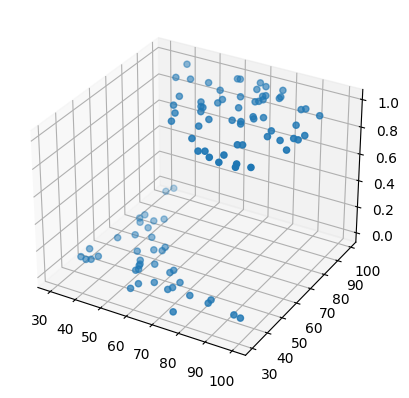

In [ ]:
# Трехмерная визуализация
ax = plt.axes(projection = '3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
plt.show()

In [ ]:
#Стандартизировать данные
mean = np.mean(data[:, :2], axis=0) # среднее значение только для первых двух столбцов
std = np.std(data[:, :2], axis=0) # стандартное отклонение только для первых двух столбцов
# data_std = (data[:, :2] - mean) / std # нормализация данных только для первых двух столбцов
data_std = np.column_stack([(data[:,0] - mean[0]) / std[0], (data[:,1] - mean[1]) / std[1], data[:,2]])
print(f"Среднее значение:\n", mean)
print(f"Стандартное отклонение:\n", std)
print(f"Нормализация данных только для первых двух столбцов:\n", data_std)

Среднее значение:
 [65.64427406 66.22199809]
Стандартное отклонение:
 [19.36068671 18.48963567]
Нормализация данных только для первых двух столбцов:
 [[-1.60224763  0.63834112  0.        ]
 [-1.82625564 -1.2075414   0.        ]
 [-1.53903969  0.3612943   0.        ]
 [-0.28210129  1.0863683   1.        ]
 [ 0.69152826  0.49337794  1.        ]
 [-1.06199728 -0.5357394   0.        ]
 [-0.23437234  1.63818413  1.        ]
 [ 0.4845113  -1.06373024  1.        ]
 [ 0.53998666  1.14651105  1.        ]
 [ 0.97044832 -1.22709853  1.        ]
 [ 1.56075461 -1.51418452  0.        ]
 [ 0.48393864 -1.92641626  0.        ]
 [ 0.86065022  0.55490359  1.        ]
 [ 0.1921582   1.70347834  1.        ]
 [-1.34839922  0.53082781  0.        ]
 [-0.60293429  1.24314792  1.        ]
 [ 0.17694982 -0.72913975  1.        ]
 [ 0.11893077 -1.05699346  0.        ]
 [ 0.25914553  1.44433023  1.        ]
 [ 0.58543944 -1.00845873  1.        ]
 [ 0.0892403  -1.26468472  0.        ]
 [ 1.2413042  -0.02285779  1.  

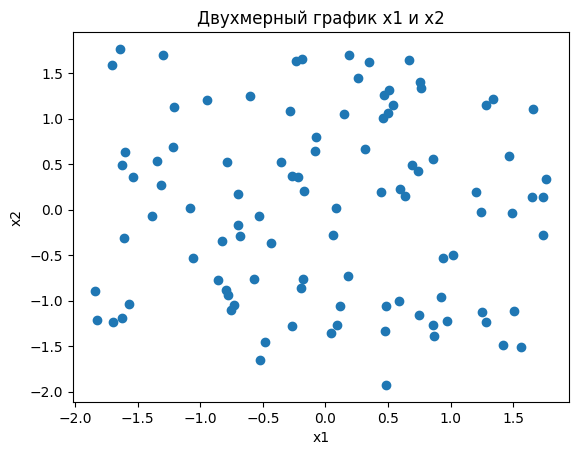

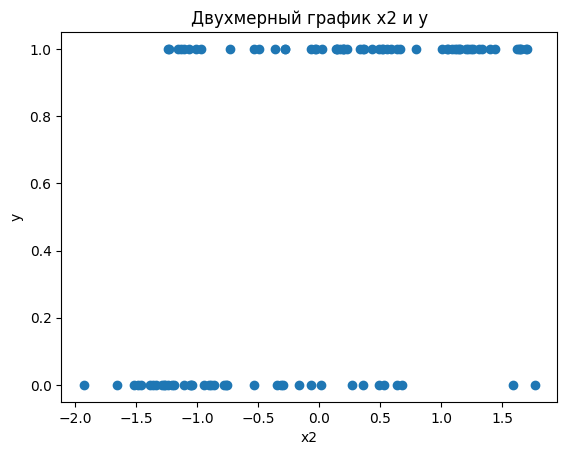

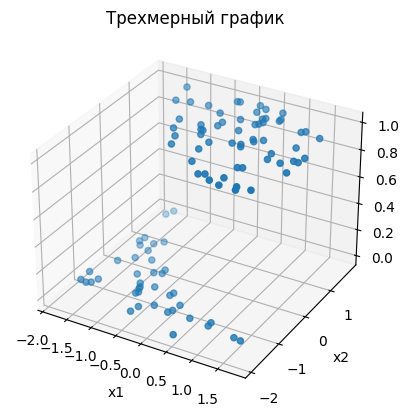

In [ ]:
#Графики
plt.scatter(data_std[:, 0], data_std[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Двухмерный график x1 и x2')
plt.show()

plt.scatter(data_std[:, 1], data_std[:, 2])
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Двухмерный график x2 и y')
plt.show()

ax = plt.axes(projection = '3d')
ax.scatter(data_std[:, 0], data_std[:, 1], data_std[:, 2])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Трехмерный график')
plt.show()

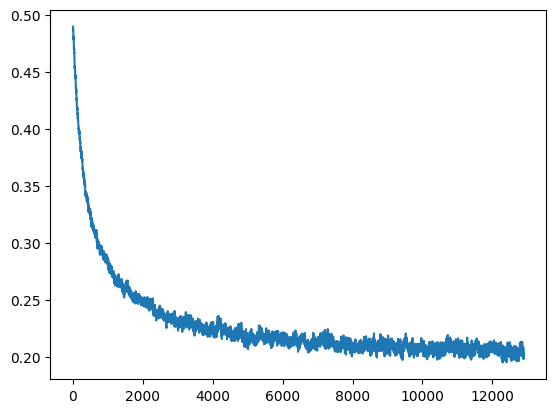

0.20196117288650162


In [ ]:
batch_size = 8
theta = np.random.uniform(size = (1, 3))
x0 = np.ones((len(data), 1))

a = 0.012
epoch =1000
matrix = np.column_stack((x0, data_std[:,0],data_std[:,1], data_std[:,2]))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(y_true, y_pred):
        return (-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)).mean()

def gradient_descent(x, y, theta):
    h = sigmoid(np.dot(theta, x.T))
    gradient = np.dot((h - y.T), x)
    return gradient / len(x)

error = []
def calc(matrix, batch_size, a, theta, t_size, epoch):

    for i in range(epoch):
        np.random.shuffle(matrix)
        for j in range(math.ceil(len(data) / batch_size)):
            batch_x = matrix[j*batch_size : j*batch_size + batch_size, :t_size]
            batch_y = matrix[j*batch_size : j*batch_size + batch_size, -1:]
            theta -= a * gradient_descent(batch_x, batch_y, theta)
            h = sigmoid(np.dot(theta, batch_x.T))
            err = log_loss(batch_y.T, h)
            error.append(err)
    return error

error = calc(matrix, batch_size, a, theta, 3, epoch)

# График функции ошибки
window = len(data)
for i in range(len(error)-window):
    error[i] = sum(error[i:i+window]) / window
error = error[:-window]

yplot = np.array(error)
xplot = np.array(range(0, len(error)))
plt.plot(xplot, yplot)
plt.show()
print(error[-1])

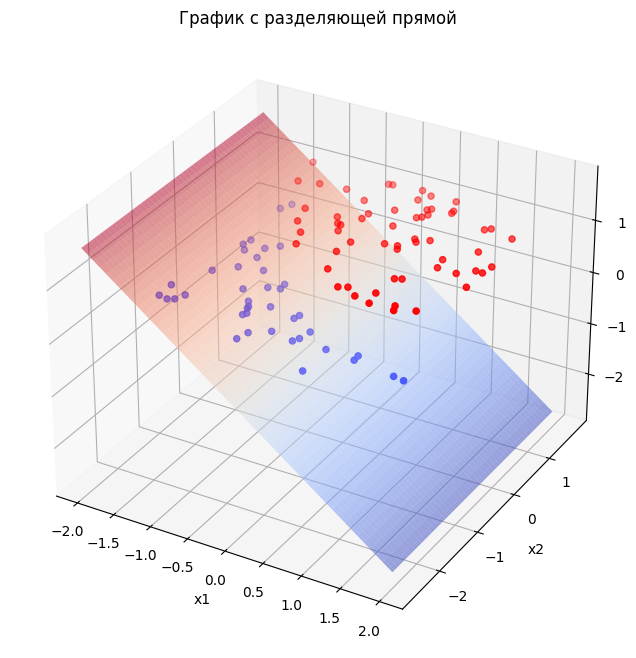

0.20196117288650162


In [ ]:
#Отображение разделяющей прямой
# Две отдельные выборки данных
data_std_0 = data_std[data_std[:, -1] == 0]
data_std_1 = data_std[data_std[:, -1] == 1]

# Создание сетки точек для отображения разделяющей прямой
x1_values = np.linspace(-2, 2, 100)
x2_values = -(theta[0][0] + theta[0][1] * x1_values) / theta[0][2] #np.linspace(-2, 2, 100)
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)
y_grid = -(theta[0][0] + theta[0][1] * x1_grid) / theta[0][2]

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Отображение точек данных
ax.scatter(data_std_0[:, 0], data_std_0[:, 1], data_std_0[:, 2], c='b')
ax.scatter(data_std_1[:, 0], data_std_1[:, 1], data_std_1[:, 2], c='r')

# Отображение разделяющей прямой
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('График с разделяющей прямой')

plt.show()

print(error[-1])

In [ ]:
errors_1 = []
err = 0
t0_arr = []
t1_arr = []
step = 1
scope = 100

x1 = data_std[:, 0]
x2 = data_std[:, 1]

for i in np.arange(theta[0][0] - 500, theta[0][0] + 500, step):
    for j in np.arange(theta[0][1] - scope, theta[0][1] + scope, step):
        err = 0
        for k in range(len(data)):
            x1_i = x1[k]
            x2_i = x2[k]
            h = j * x1_i + i
            err += (h - x2_i) ** 2
        err/=len(data)
        errors_1.append(err)
        t0_arr.append(i)
        t1_arr.append(j)

[-18.56490673 -18.46490673 -18.36490673 -18.26490673 -18.16490673
 -18.06490673 -17.96490673 -17.86490673 -17.76490673 -17.66490673
 -17.56490673 -17.46490673 -17.36490673 -17.26490673 -17.16490673
 -17.06490673 -16.96490673 -16.86490673 -16.76490673 -16.66490673
 -16.56490673 -16.46490673 -16.36490673 -16.26490673 -16.16490673
 -16.06490673 -15.96490673 -15.86490673 -15.76490673 -15.66490673
 -15.56490673 -15.46490673 -15.36490673 -15.26490673 -15.16490673
 -15.06490673 -14.96490673 -14.86490673 -14.76490673 -14.66490673
 -14.56490673 -14.46490673 -14.36490673 -14.26490673 -14.16490673
 -14.06490673 -13.96490673 -13.86490673 -13.76490673 -13.66490673
 -13.56490673 -13.46490673 -13.36490673 -13.26490673 -13.16490673
 -13.06490673 -12.96490673 -12.86490673 -12.76490673 -12.66490673
 -12.56490673 -12.46490673 -12.36490673 -12.26490673 -12.16490673
 -12.06490673 -11.96490673 -11.86490673 -11.76490673 -11.66490673
 -11.56490673 -11.46490673 -11.36490673 -11.26490673 -11.16490673
 -11.06490

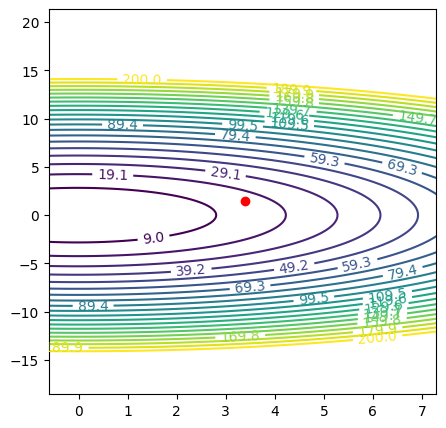

In [ ]:
#Изобата
errors = []
err = 0
step = 0.1
scope = 20
t0_arr = np.arange(theta[0][0] - scope, theta[0][0] + scope, step)
t1_arr = np.arange(theta[0][1] - 4, theta[0][1] + 4, step)


for i in t0_arr:
    for j in t1_arr:
        err = 0
        for k in range(len(data)):
            x1_i = x1[k]
            x2_i = x2[k]
            h = j * x1_i + i
            err += (h - x2_i) ** 2
        err/=len(data)
        errors.append(err)

print(t0_arr,t1_arr,err)

plt.figure(figsize=(5,5))
curves = plt.contour(t1_arr, t0_arr, np.array(errors).reshape(len(t0_arr), len(t1_arr)), np.linspace(9, 200, 20))
plt.clabel(curves)
plt.plot(theta[0][1], theta[0][0], 'ro')
plt.show()